In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# K Means Clustering

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


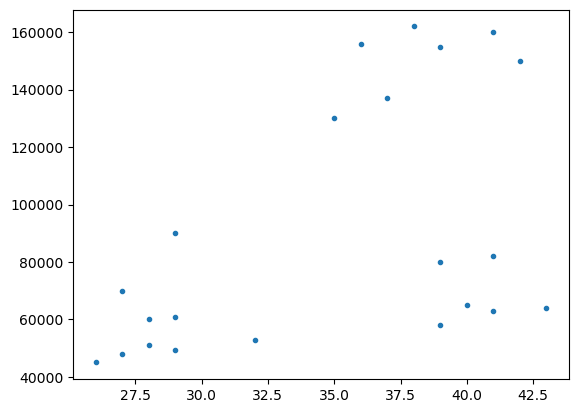

In [3]:
plt.scatter(df["Age"], df["Income($)"], marker = ".")

In [4]:
from sklearn.cluster import KMeans

In [5]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [6]:
y_predicted = km.fit_predict(df.drop(["Name"], axis = 1))

C:\Users\manas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
df["cluster"] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,2


Text(0, 0.5, 'Income($)')

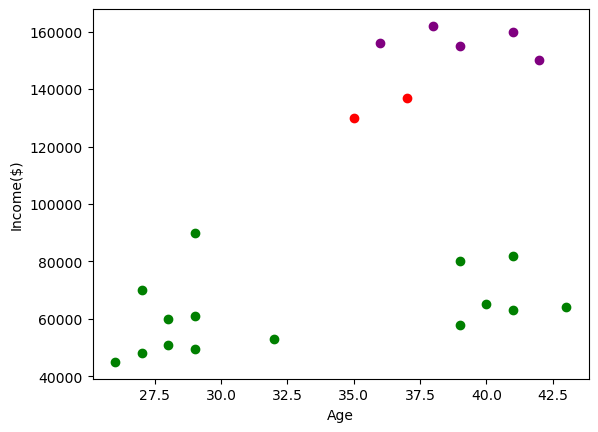

In [8]:
df1 = df[df["cluster"] == 0]
df2 = df[df["cluster"] == 1]
df3 = df[df["cluster"] == 2]

plt.scatter(df1["Age"], df1["Income($)"], color = "red")
plt.scatter(df2["Age"], df2["Income($)"], color = "green")
plt.scatter(df3["Age"], df3["Income($)"], color = "purple")

plt.xlabel("Age")
plt.ylabel("Income($)")

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()
scaler.fit(df[["Income($)"]])
df["Income($)"] = scaler.transform(df[["Income($)"]])

scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])

df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [11]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[["Age","Income($)"]])
df["Cluster"] = y_predicted
df.head()

C:\Users\manas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Name,Age,Income($),cluster,Cluster
0,Rob,0.058824,0.213675,1,1
1,Michael,0.176471,0.384615,1,1
2,Mohan,0.176471,0.136752,1,1
3,Ismail,0.117647,0.128205,1,1
4,Kory,0.941176,0.897436,2,0


In [12]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

Text(0, 0.5, 'Income($)')

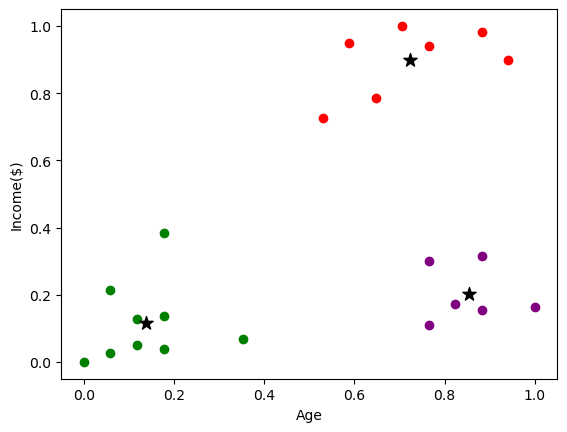

In [13]:
df1 = df[df["Cluster"] == 0]
df2 = df[df["Cluster"] == 1]
df3 = df[df["Cluster"] == 2]

plt.scatter(df1["Age"], df1["Income($)"], color = "red")
plt.scatter(df2["Age"], df2["Income($)"], color = "green")
plt.scatter(df3["Age"], df3["Income($)"], color = "purple")

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], marker="*", color = "black", s = 100)

plt.xlabel("Age")
plt.ylabel("Income($)")

In [14]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[["Age", "Income($)"]])
    sse.append(km.inertia_)

C:\Users\manas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\manas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\manas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\manas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [15]:
sse

[5.434011511988178,
 2.3456144914725936,
 0.4750783498553096,
 0.3881529166478744,
 0.2818479744366238,
 0.29241312948269843,
 0.17681044133887713,
 0.1468869221896904,
 0.10497488680620909]

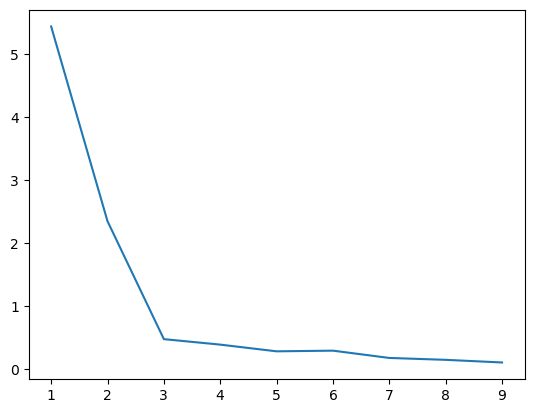

In [33]:
plt.plot(k_range, sse)

In [35]:
from sklearn.datasets import load_iris
iris = load_iris()

In [37]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [39]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [43]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [47]:
df.drop(["sepal length (cm)", "sepal width (cm)"], axis = 1, inplace = True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


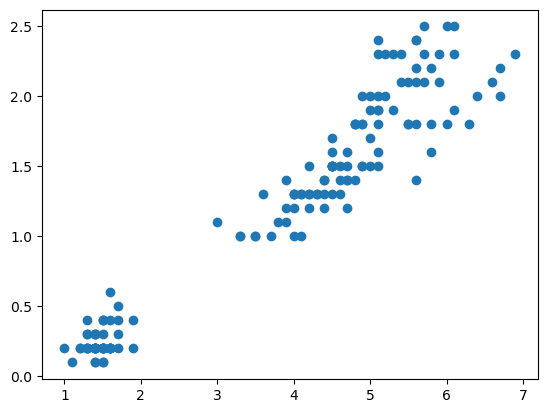

In [49]:
plt.scatter(df["petal length (cm)"], df["petal width (cm)"])

In [59]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[["petal length (cm)", "petal width (cm)"]])
    sse.append(km.inertia_)
sse

C:\Users\manas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\manas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\manas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\manas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

[550.8953333333333,
 86.39021984551395,
 31.371358974358976,
 20.2996078034854,
 14.249302174975561,
 11.040239971910452,
 9.88501366607249,
 7.972309523809523,
 6.671168597742127]

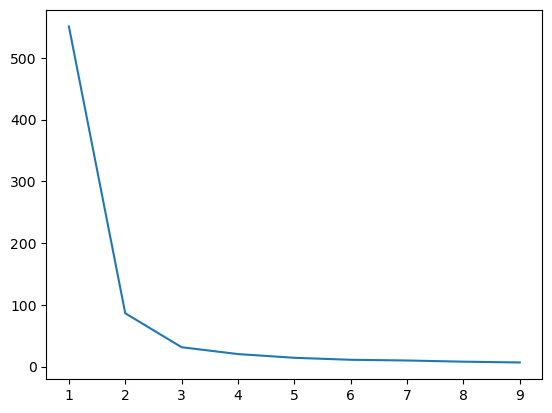

In [61]:
plt.plot(k_range, sse)

In [63]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df)
y_predicted

C:\Users\manas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [67]:
df["Cluster"] = y_predicted
df.tail()

,petal length (cm),petal width (cm),Cluster
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2
149,5.1,1.8,2


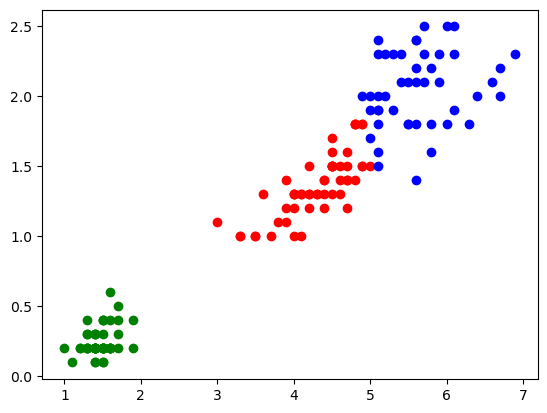

In [69]:
df1 = df[df["Cluster"] == 0]
df2 = df[df["Cluster"] == 1]
df3 = df[df["Cluster"] == 2]

plt.scatter(df1["petal length (cm)"], df1["petal width (cm)"], c = "Red")
plt.scatter(df2["petal length (cm)"], df2["petal width (cm)"], c = "Green")
plt.scatter(df3["petal length (cm)"], df3["petal width (cm)"], c = "Blue")


In [71]:
df.head()

,petal length (cm),petal width (cm),Cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [77]:
scaler = MinMaxScaler()
scaler.fit(df[["petal length (cm)"]])
df["petal length (cm)"] = scaler.transform(df[["petal length (cm)"]])

scaler = MinMaxScaler()
scaler.fit(df[["petal width (cm)"]])
df["petal width (cm)"] = scaler.transform(df[["petal width (cm)"]])

df.head()

,petal length (cm),petal width (cm),Cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


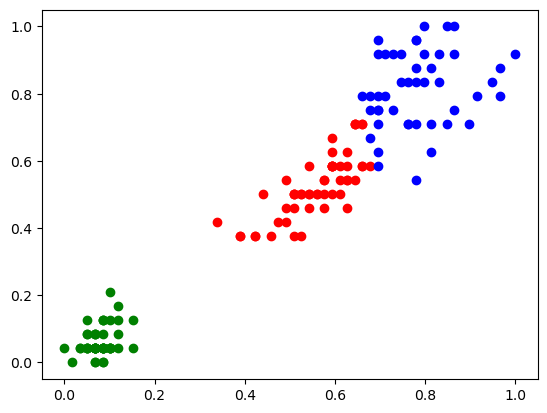

In [86]:
df1 = df[df["Cluster"] == 0]
df2 = df[df["Cluster"] == 1]
df3 = df[df["Cluster"] == 2]

plt.scatter(df1["petal length (cm)"], df1["petal width (cm)"], c = "Red")
plt.scatter(df2["petal length (cm)"], df2["petal width (cm)"], c = "Green")
plt.scatter(df3["petal length (cm)"], df3["petal width (cm)"], c = "Blue")
# plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker = "*", c = "black")


In [82]:
km.cluster_centers_

array([[4.29259259, 1.35925926],
       [1.462     , 0.246     ],
       [5.62608696, 2.04782609]])